# Classical Machine Learning

In case you do not dispose from a local environment please launch this repository from 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/Talan-TechForData/datascience-solutions/HEAD?labpath=problem.ipynb) 
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Talan-TechForData/datascience-solutions/blob/main/1_exploratory_data_analysis/taxinyc_analysis/problem.ipynb)

## Situational description 

In this case we consider a classical dataset describing blood transfusions.

In [2]:
%pip install pandas matplotlib scikit-learn tensorflow

Note: you may need to restart the kernel to use updated packages.


It's the Blood Transfusion Service Center dataset, commonly used in ML. It typically contains features like recency, frequency, monetary, and time of donation.

Attributes:

- Recency (R): Number of months since the donor’s most recent blood donation.
- Frequency (F): Total number of times the donor has donated blood.
- Monetary (M): Total volume of blood donated in cubic centimeters (c.c.).
- Time (T): Number of months since the donor’s first blood donation.
- Class Donation in March 2007: Binary indicator (1 if the donor gave blood in March 2007, 0 otherwise).

In [3]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/INRIA/scikit-learn-mooc/refs/heads/main/datasets/blood_transfusion.csv')

df.head()


,Recency,Frequency,Monetary,Time,Class
0,2,50,12500,98,donated
1,0,13,3250,28,donated
2,1,16,4000,35,donated
3,2,20,5000,45,donated
4,1,24,6000,77,not donated


1. In this case what kind of problems can be solved with this dataset via ML?

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Recency    748 non-null    int64 
 1   Frequency  748 non-null    int64 
 2   Monetary   748 non-null    int64 
 3   Time       748 non-null    int64 
 4   Class      748 non-null    object
dtypes: int64(4), object(1)
memory usage: 29.3+ KB


2. Consider the following piece of code. Explain what the piece of code does and the conclusions this might bring

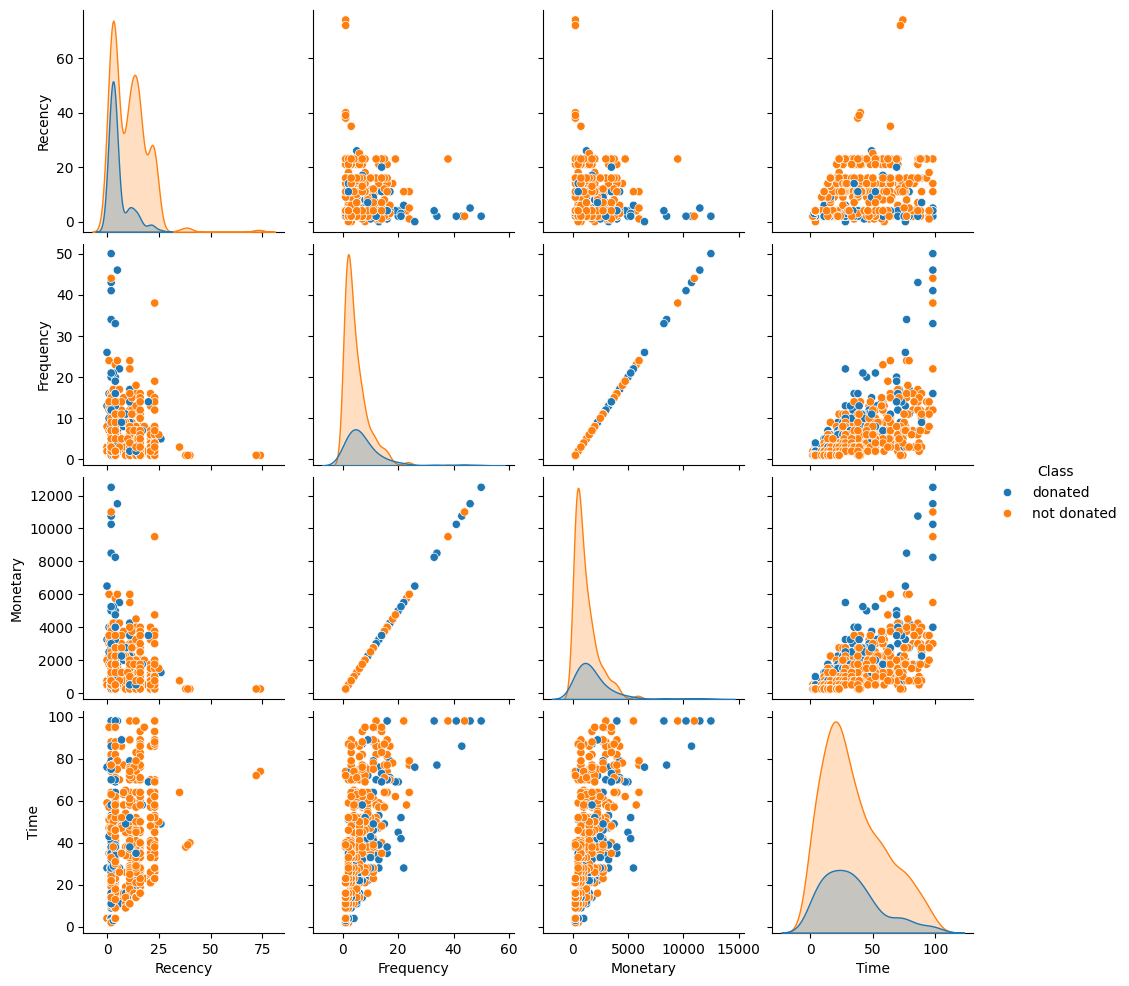

In [5]:
import seaborn as sns

sns.pairplot(df, hue='Class')

The exploratory analysis with the pairplot indicates that:

- Recency, Frequency, and Monetary are the most informative features for predicting donor behavior.
- Donors who have donated recently and more frequently (and thus have a higher cumulative donation amount) are more likely to donate again.
- There is a potential issue with class imbalance and some redundancy between Frequency and Monetary.

3. What does the following code does?

In [6]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

data = df.drop(columns="Class")
target = df["Class"]

model = make_pipeline(StandardScaler(), SVC())

from sklearn.model_selection import cross_validate, ShuffleSplit

cv = ShuffleSplit(random_state=0)
cv_results = cross_validate(model, data, target, cv=cv, n_jobs=2)
cv_results = pd.DataFrame(cv_results)

In [7]:
cv_results

,fit_time,score_time,test_score
0,0.021171,0.005606,0.680000
1,0.020610,0.005607,0.746667
2,0.022170,0.005584,0.786667
3,0.022251,0.005796,0.800000
4,0.020565,0.006070,0.746667
5,0.019951,0.005724,0.786667
6,0.019226,0.005183,0.800000
7,0.016738,0.006977,0.826667
8,0.016634,0.004705,0.746667
9,0.016739,0.004686,0.733333


This corresponds to the outcome of a cross validation exercise where the main task is to perform classification to determine the potential predictability of a donor. 

4. What does the following code do?

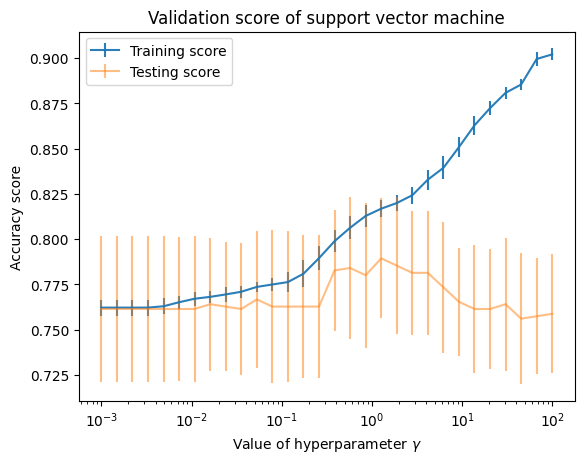

In [8]:
import numpy as np
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

gammas = np.logspace(-3, 2, num=30)
param_name = "svc__gamma"
train_scores, test_scores = validation_curve(
    model,
    data,
    target,
    param_name=param_name,
    param_range=gammas,
    cv=cv,
    n_jobs=2,
)

plt.errorbar(
    gammas,
    train_scores.mean(axis=1),
    yerr=train_scores.std(axis=1),
    alpha=0.95,
    label="Training score",
)
plt.errorbar(
    gammas,
    test_scores.mean(axis=1),
    yerr=test_scores.std(axis=1),
    alpha=0.5,
    label="Testing score",
)
plt.legend()

plt.xscale("log")
plt.xlabel(r"Value of hyperparameter $\gamma$")
plt.ylabel("Accuracy score")
_ = plt.title("Validation score of support vector machine")


R. The following code performs:

1. **Hyperparameter Tuning with `validation_curve`** – The code evaluates different values of **gamma (𝛾)** for an **SVM model** to analyze its effect on accuracy.  

2. **Logarithmic Gamma Range** – It generates **30 values** for gamma between \(10^{-3}\) and \(10^2\) using `np.logspace(-3, 2, num=30)`.  

3. **Cross-Validation Performance** – `validation_curve` computes training and testing scores across different gamma values using **cross-validation (cv)**.  

4. **Bias-Variance Tradeoff** – The **training curve** (high at large gamma values) and **testing curve** (peaking at an optimal gamma) help identify underfitting (low gamma) and overfitting (high gamma).  

5. **Visualization with Error Bars** – `plt.errorbar()` plots **mean accuracy** with **standard deviation** to show score variability for both training and testing sets.  

6. **Logarithmic Scale for Better Interpretation** – The x-axis uses `plt.xscale("log")` to clearly display **exponential changes in gamma values** and their impact on model accuracy. 🚀

5. Can you explain the following code?

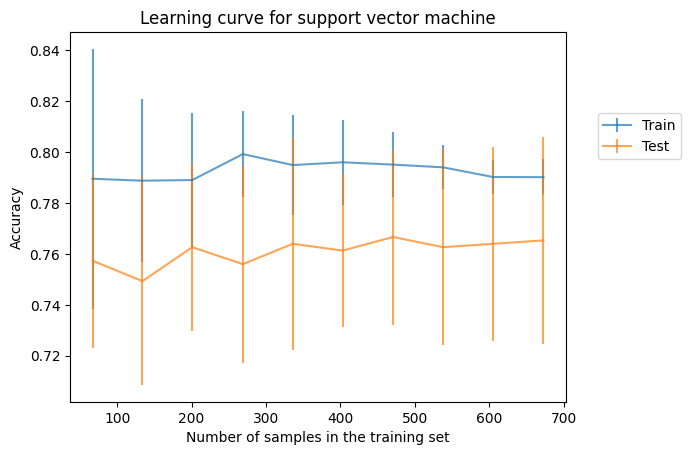

In [9]:
from sklearn.model_selection import LearningCurveDisplay

train_sizes = np.linspace(0.1, 1, num=10)
LearningCurveDisplay.from_estimator(
    model,
    data,
    target,
    train_sizes=train_sizes,
    cv=cv,
    score_type="both",
    scoring="accuracy",  # this is already the default for classifiers
    score_name="Accuracy",
    std_display_style="errorbar",
    errorbar_kw={"alpha": 0.7},  # transparency for better visualization
    n_jobs=2,
)

plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Learning curve for support vector machine")


1. **Learning Curve Analysis** – The code uses `LearningCurveDisplay.from_estimator` to visualize **how model performance changes** as the training set size increases, helping diagnose **bias vs. variance** issues.  

2. **Training Set Variation** – `train_sizes = np.linspace(0.1, 1, num=10)` tests model performance with training sizes from **10% to 100%**, showing how accuracy evolves with more data.  

3. **Visualization with Error Bars** – The plot includes **both training and validation scores** (`score_type="both"`) with **error bars** (`std_display_style="errorbar"`) to highlight variability, helping assess model **generalization**. 🚀

# Fin